In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as r
import json


* Showing the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
* Finding the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
* Finding the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
* Detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Delhi - NCR =>  7947
Rest of India =>  705


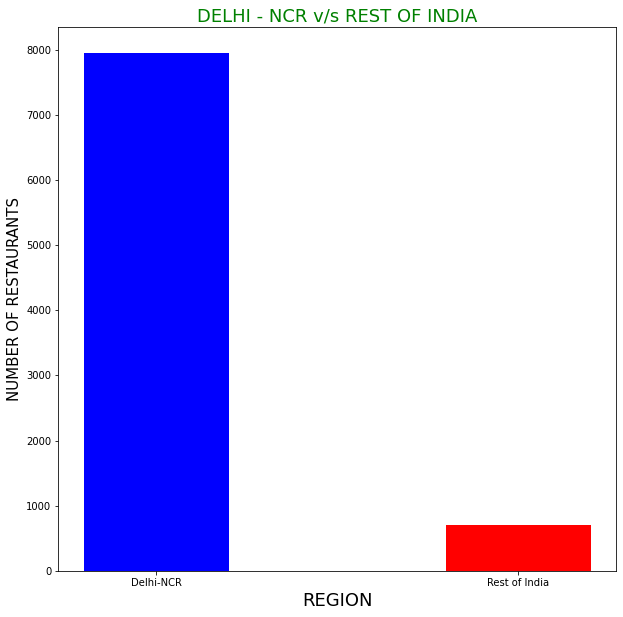

In [2]:
d = pd.read_csv('zomato.csv')
d = d[d['Country Code'] == 1]
data = d.copy()
a = data.copy()
b = a[(a.City == 'New Delhi') | (a.City == 'Ghaziabad') | (a.City == 'Noida') | 
      (a.City == 'Gurgaon') | (a.City == 'Faridabad')]
y = b.City.count()
x = a.City.count() - y
print("Delhi - NCR => " , y)
print("Rest of India => " , x)
plt.figure ( figsize =(10,10) )
plt.bar(['Delhi-NCR','Rest of India'] , [y , x] , width = 0.4 , color = ['blue','red'])
plt.xlabel('REGION' , size = 18)
plt.ylabel('NUMBER OF RESTAURANTS' , size = 15)
plt.title("DELHI - NCR v/s REST OF INDIA" , size = 18 , color = 'green')
plt.show()

In [3]:
a = data.copy()
c = a[(a.City != 'New Delhi') & (a.City != 'Ghaziabad') & (a.City != 'Noida') & (a.City != 'Gurgaon') & (a.City != 'Faridabad')]
cuis_DL = b.Cuisines # CARRYING THE VALUES FROM ABOVE
cuis_ROI = c.Cuisines
dDL=[]
dROI=[]

for i in cuis_DL:
    for j in i.split(','):
        dDL.append(j.strip())
for i in cuis_ROI:
    for j in i.split(','):
        dROI.append(j.strip())
        
# CUISINES PRESENT IN INDIA EXCEPT FOR DELHI NCR
print(set(dROI) - set(dDL))

{'Cajun', 'German', 'Malwani', 'BBQ'}


In [4]:
params={"user_key":'627c28c07ad221c65491bbffea6f5d54',"city_id":1}
headers={"Accept": "application/json","user-key":"627c28c07ad221c65491bbffea6f5d54"}
response=r.get('https://developers.zomato.com/api/v2.1/cuisines', 
               headers = headers , params = params)
data=response.json()
delhi_cus_api=[]
for i in data['cuisines']:
    delhi_cus_api.append(i['cuisine']['cuisine_name'])

delhi_cus_api = set(delhi_cus_api)

print("Those cuisines which are actually in DELHI - NCR but not mentioned in the dataset :")
for i in delhi_cus_api:
    if i in (set(dROI) - set(dDL)):
        print(i)

Those cuisines which are actually in DELHI - NCR but not mentioned in the dataset :
Malwani
BBQ


In [5]:
print("Top 10 cuisines served in Rest of India : ")
print(pd.Series(dROI).value_counts().iloc[0:10])
print()
print('------------')
print()
print("Top 10 cuisines served in Delhi - NCR : ")
print(pd.Series(dDL).value_counts().iloc[0:10])

Top 10 cuisines served in Rest of India : 
North Indian    349
Chinese         242
Continental     177
Italian         147
Cafe            136
Fast Food        97
South Indian     62
Mughlai          59
Desserts         55
Mexican          50
dtype: int64

------------

Top 10 cuisines served in Delhi - NCR : 
North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
dtype: int64


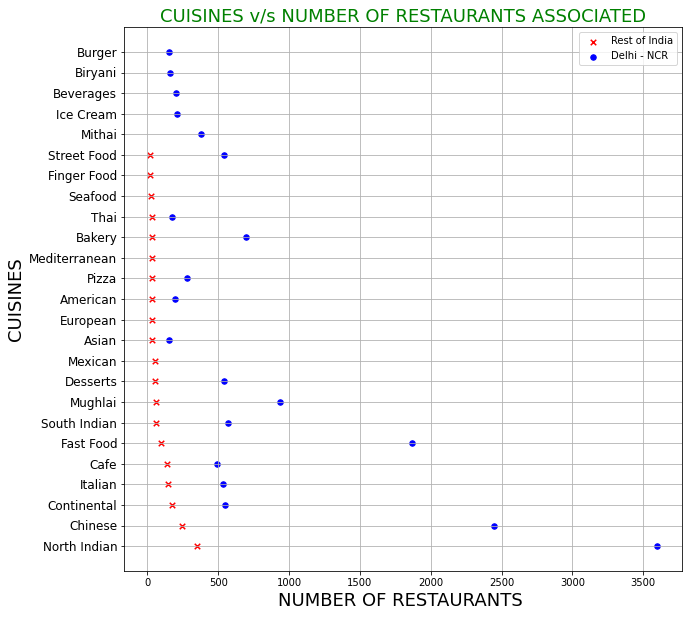

Top cuisines in Delhi - NCR
North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
Cafe             491
Mithai           379
Pizza            282
Ice Cream        210
Beverages        204
American         193
Thai             176
Biryani          160
Burger           152
Asian            151
dtype: int64

-------------------------------------

Top cuisines in Rest of India
North Indian     349
Chinese          242
Continental      177
Italian          147
Cafe             136
Fast Food         97
South Indian      62
Mughlai           59
Desserts          55
Mexican           50
Asian             35
European          32
American          32
Pizza             31
Mediterranean     30
Bakery            29
Thai              29
Seafood           28
Finger Food       17
Street Food       16
dtype: int64


In [6]:
plt.figure( figsize = ( 10 , 10 ) )
plt.scatter(pd.Series(dROI).value_counts().iloc[0:20] , 
            pd.Series(dROI).value_counts().iloc[0:20].index ,
            s = 30, marker = 'x' , label = 'Rest of India' , color = 'red')
plt.scatter(pd.Series(dDL).value_counts().iloc[0:20] , 
            pd.Series(dDL).value_counts().iloc[0:20].index ,
            s = 30 , marker = 'o' , label = 'Delhi - NCR' , color = 'blue')
plt.yticks(size = 12)
plt.grid()
plt.ylabel("CUISINES" , size = 18)
plt.xlabel("NUMBER OF RESTAURANTS " , size = 18)
plt.title("CUISINES v/s NUMBER OF RESTAURANTS ASSOCIATED" , size = 18 , color = 'green')
plt.legend()
plt.show()
print("Top cuisines in Delhi - NCR")
print(pd.Series(dDL).value_counts().iloc[0:20])
print()
print("-------------------------------------")
print()
print("Top cuisines in Rest of India")
print(pd.Series(dROI).value_counts().iloc[0:20])

#### DETAILED ANALYSIS

* From the above graph we can conclude that "North Indian" is the most popular with more than 3500 restaurants among Delhi-NCR as well as rest of India. Here, I have plotted only those 20 important cuisines which are common in both Delhi-NCR and other states for better analysis. * * 

##### => There are some cuisines present in other states and that are not present in any restaurant of Delhi-NCR. 

* After North Indian cuisine we have chinese cuisine with 2448 restaurants in Delhi-NCR and 242 in Rest of India. 
* After these two we have fast food with 1866 restaurants in Delhi-NCR and 97 in Rest of India (with a huge difference). 
* After this we have Mughlai cuisine  in Delhi-NCR with 933 restaurants and 59 in the Rest of India and there are many more cuisines as show in the graph. 

#### 1) Detail analysis of how the rating is affected by restaurant due following features:
* Number of Votes given Restaurant
* Restaurant serving more number of cuisines.
* Average Cost of Restaurant
* Restaurant serving some specific cuisines.

#### 2) Finding the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
* Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

## ASSUMING ONLY INDIAN CITIES

624     3.9
625     3.5
626     3.6
627     4.0
628     4.2
       ... 
9271    3.6
9272    3.7
9273    4.3
9274    3.8
9275    4.4
Name: Aggregate rating, Length: 8652, dtype: float64 624     140
625      71
626      94
627      87
628     177
       ... 
9271    193
9272     85
9273    172
9274     74
9275    316
Name: Votes, Length: 8652, dtype: int64


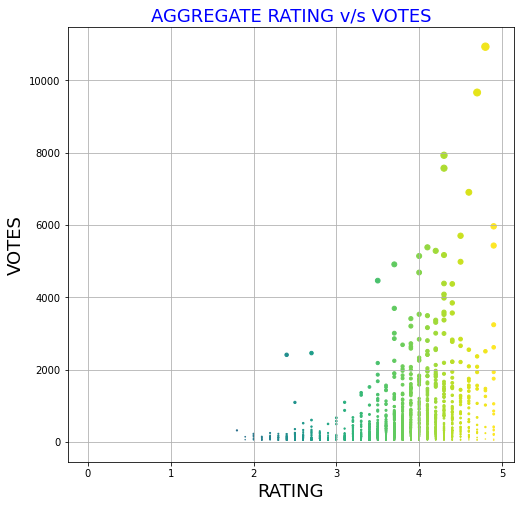

In [7]:
data = d.copy()
rating = data['Aggregate rating']
votes = data.Votes
print(rating , votes)
plt.figure( figsize = ( 8 , 8 ))
plt.scatter(rating , votes , c = rating , marker = '.', s = votes//50)
plt.xlabel('RATING' , size = 18)
plt.ylabel('VOTES' , size = 18)
plt.title("AGGREGATE RATING v/s VOTES" , size = 18 , color = 'blue')
plt.grid()
plt.show()

#### ANALYSIS

* As the number votes increases the aggregate rating also increases for the restaurant. 

* When the votes are less than 2000 there is a variation in the user ratings from 2 to 5, and when the votes are greater than 5000 there are high chance of getting the rating from 4 to 5.
* There are also some restaurants between 1000 to 2000 votes which has rating from 4 to 5. 

##### * Overall the analysis is that as the number votes increases the aggregate rating also increases for the restaurant.

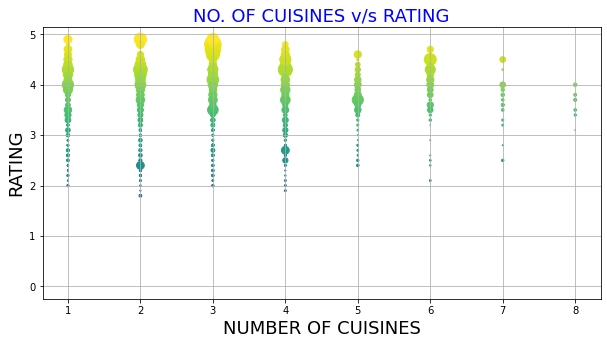

No. of cuisines served :  2 , No. of restaurants serving given number of cuisines :  3144
No. of cuisines served :  1 , No. of restaurants serving given number of cuisines :  3097
No. of cuisines served :  3 , No. of restaurants serving given number of cuisines :  1596
No. of cuisines served :  4 , No. of restaurants serving given number of cuisines :  552
No. of cuisines served :  5 , No. of restaurants serving given number of cuisines :  155
No. of cuisines served :  6 , No. of restaurants serving given number of cuisines :  70
No. of cuisines served :  7 , No. of restaurants serving given number of cuisines :  26
No. of cuisines served :  8 , No. of restaurants serving given number of cuisines :  12


In [8]:
# getting rating wrt Delhi - NCR and Rest of India
cuis = data.Cuisines

def cui_num(st):
    st = str(st)
    st = len(st.split(','))
    return st 
cuis = cuis.apply(cui_num)

plt.figure( figsize = ( 10 , 5 ))
plt.scatter(cuis , rating , c = rating , marker = '.' , s = votes//10)
plt.ylabel('RATING' , size = 18)
plt.xlabel('NUMBER OF CUISINES' , size = 18)
plt.title("NO. OF CUISINES v/s RATING" , size = 18 , color = 'blue')
plt.grid()
plt.show()
dic = dict()
# Counting the no. of each cuisines
for i in cuis:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("No. of cuisines served : ", i, ", No. of restaurants serving given number of cuisines : ", dic[i])


#### ANALYSIS 

* From the graph it is evident that providing more number of cuisines need not give much higher ratings to that particular restaurant and hence here we can see that the restaurant providing 8 cuisines is perished and low rated relatively.
* Whereas restaurant providing atmost 3 cuisines is getting the average as well as higher rating 
* In India, the restaurants (3144) that provides 2 or 3 cuisines get the higher ratings and very few restaurants which provides 8 cuisines are able to get decent rating 
* It indicates that when a restaurant provides too many cuisines , its focus on the quality of food offered diminishes and quality control seems far fetched. While restaurants providing less cuisines focus on the quality of food to get good aggregate user ratings.

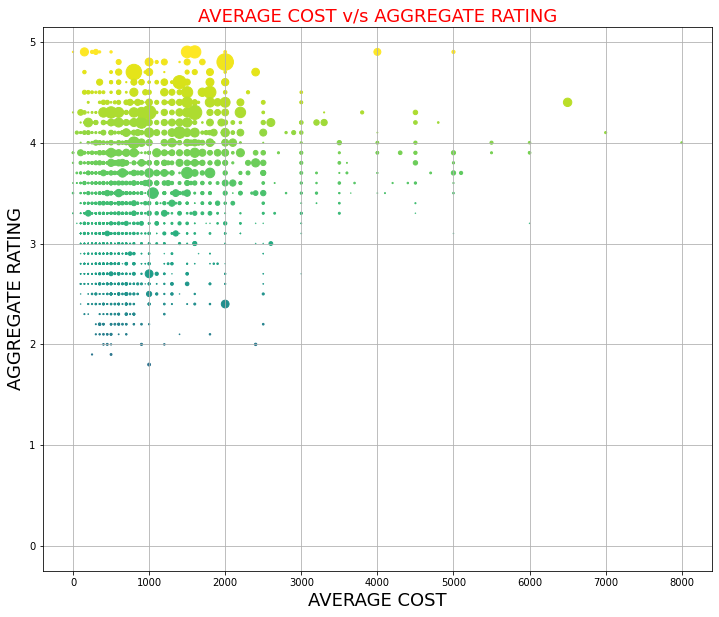

In [9]:
avg_cost = data['Average Cost for two']

plt.figure( figsize = (12 , 10))
plt.scatter(avg_cost , rating , c = rating , marker = '.' , s = votes // 10)
plt.ylabel('AGGREGATE RATING' , size = 18)
plt.xlabel('AVERAGE COST' , size = 18)
plt.title("AVERAGE COST v/s AGGREGATE RATING" , size = 18 , color = 'red')
plt.grid()
plt.show()

#### ANALYSIS 

* From the above graph it is evident that Restaurants that are rated between 3.5 and 4.5 and which has average cost for 2 ranging from 700INR to 2000INR are the most sought after restaurants.
* The restaurants that lies in the above mentioned bracket surely makes a dear profit and generally have more than 10 outlets all over the country.
* It is clear from the graph that the customers usually prefers restaurants that are cheap with higher rating.

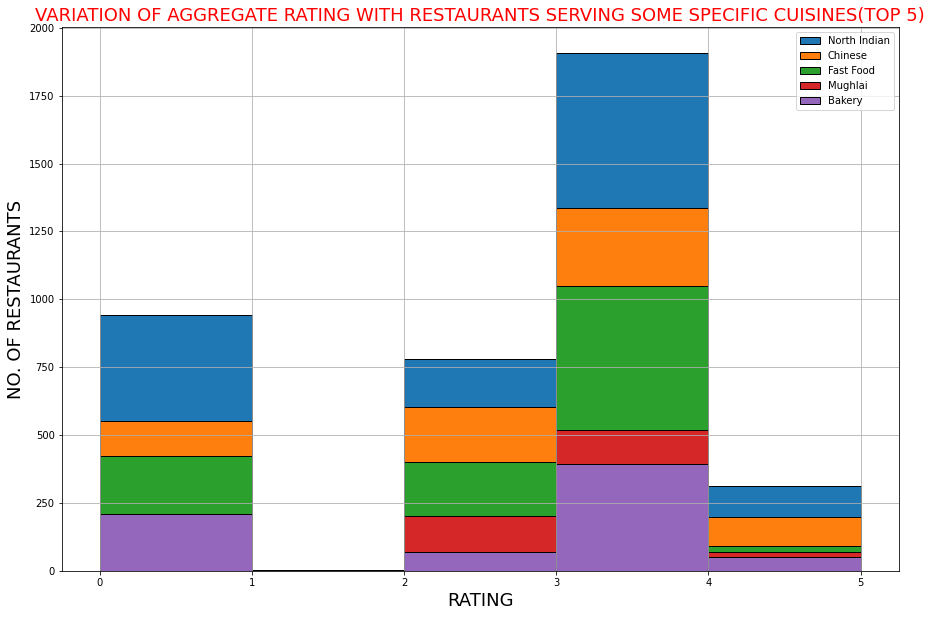

array(['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery'],
      dtype='<U12')

In [10]:
df = d.loc[d["Cuisines"].notnull()]
cuisine =[] 
for i in d["Cuisines"]:
    for j in i.split(","):
        cuisine.append(j)
dic = dict()
for i in cuisine:
    if i.strip() in dic.keys():
        dic[i.strip()] += 1
    else:
        dic[i.strip()] = 1
a = sorted(dic.items() , key = lambda x: x[1] , reverse = True)
popular = []
for i in range(5):
    popular.append(a[i][0])
np_popular = np.array(popular)

plt.figure(figsize=(15,10))
for i in np_popular:
    rating=[]
    for j,k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black',bins=[0,1,2,3,4,5])
    plt.title('Variation of aggregate rating with restaurants serving some specific cuisines(Top 5)'.upper()
              , size = 18 , color = "red")

    plt.xlabel("Rating".upper() , size = 18)
    plt.ylabel("No. of Restaurants".upper() , size = 18)

plt.grid()
plt.legend(labels=np_popular)
plt.show()
np_popular 

#### ANALYSIS 

* From the above histogram plot, it is clear that North Indian Cuisine is the best rated among all the cuisines in all the aggregate ratings. 
* After it comes the Chinese Cuisine, it is rated between 3 to 4 maximum number of times.
* Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.
* After this comes Mughlai Cuisine , Italian Cuisine and Bakery
* It seems like the people enjoy the Italian cuisine very much because it has a considerable rating between 3 to 4 and 4 to 5 also.


WEIGHTED RESTAURANT RATING
###### !---- THIS IS ONLY FOR INDIAN CITIES ----!

In [11]:
# THIS IS ONLY FOR INDIAN CITIES
data = d.copy()
data['weight_rest'] = data['Votes'] * data['Aggregate rating']
data = data.groupby('Locality').sum()
data.weight_rest = data.weight_rest / data.Votes
data.dropna(subset = ['weight_rest'] , inplace = True)
data = data.sort_values('weight_rest').loc[:,'weight_rest'].iloc[-10:]
print("Top 10 Localities with more weighted restaurant rating : ")
print(data[::-1])

Top 10 Localities with more weighted restaurant rating : 
Locality
Aminabad                            4.900000
Hotel Clarks Amer, Malviya Nagar    4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Express Avenue Mall,  Royapettah    4.800000
Deccan Gymkhana                     4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000
Name: weight_rest, dtype: float64


###### !---- CONSIDERING ALL LOCALITIES OUTSIDE OF INDIA AS WELL ----!

In [12]:
df = pd.read_csv('zomato.csv')
np_rating = np.array([i for i in df['Aggregate rating']])
np_votes = np.array([i for i in df['Votes']])
np_locality = np.array([i for i in df['Locality']])

# Created the dictionry dic and calculated the weighted rating for each loaclity
dic = dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere( np_locality == i ) ] )[0] != 0:
        dic[i] = sum((np_votes * np_rating)[np.argwhere(np_locality == i)])[0] / sum(np_votes[np.argwhere(np_locality == i)])[0]

np_local = np.array([i for i in dic.keys()])
np_wrr = np.array([i for i in dic.values()])

np_local = np_local[np.argsort(np_wrr)][::-1]
np_wrr = np.sort(np_wrr)[::-1]

print("Top 10 Localities with more weighted restaurant rating :")
print("--------------------------------------------------------")
for i in range(10):
    print(np_local[i])


Top 10 Localities with more weighted restaurant rating :
--------------------------------------------------------
Fort Street
Marshalltown
DIFC
Kenwood
Penjaringan
Nassima Royal Hotel, Trade Centre Area
Setor De Clubes Esportivos Sul
Aminabad
Bishopsgate, City Of London
Old Dutch Hospital, Fort


### Visualization
* Plot the bar graph top 15 restaurants have a maximum number of outlets.
* Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
* Plot the bar graph top 10 restaurants in the data with the highest number of votes.
* Plot the pie graph of top 10 cuisines present in restaurants in the USA.
* Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Giani               29
Pizza Hut           29
Baskin Robbins      28
Barbeque Nation     25
Giani's             22
Dunkin' Donuts      22
Barista             22
Pind Balluchi       20
Costa Coffee        20
Name: Restaurant Name, dtype: int64


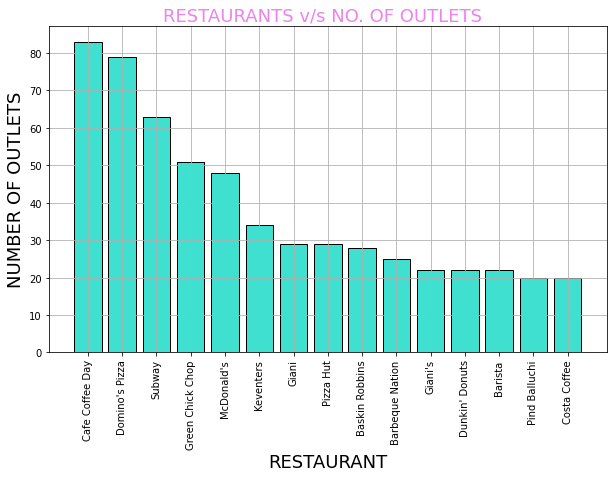

In [18]:
data = d.copy()
D = data['Restaurant Name'].value_counts()[:15]
print(D)
plt.figure(figsize=(10,6))
plt.bar(data['Restaurant Name'].value_counts()[:15].index , 
        data['Restaurant Name'].value_counts()[:15] , color = 'turquoise' , edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Restaurant'.upper() , size = 18)
plt.ylabel('Number of Outlets'.upper() , size = 18)
plt.title("RESTAURANTS v/s NO. OF OUTLETS  " , size = 18 , color = 'violet')
plt.grid()
plt.show()

0.0    2139
3.1     511
3.2     510
3.4     477
3.3     472
3.0     465
3.5     454
3.6     411
2.9     380
3.7     363
3.8     336
2.8     314
3.9     283
2.7     250
4.0     193
2.6     190
4.1     185
4.2     140
2.5     109
4.3     100
2.4      83
4.4      74
2.3      46
4.5      37
4.6      35
2.2      26
4.9      19
4.7      16
2.1      15
4.8       9
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


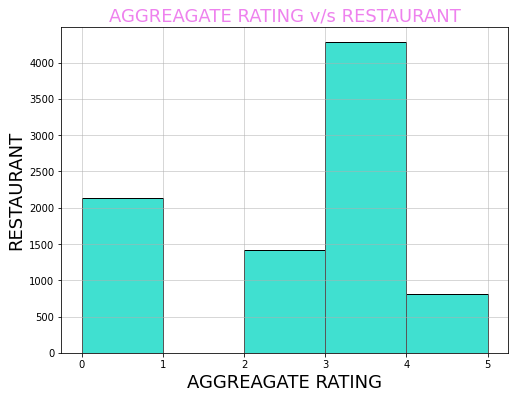

In [21]:
data = d.copy()

y_axis = data['Aggregate rating'].dropna()
print(y_axis.value_counts())
plt.figure(figsize=(8,6))
plt.hist(y_axis , color = 'turquoise' , edgecolor = 'black' , bins = range(6))
plt.xlabel('AGGREAGATE RATING' , size = 18)
plt.ylabel('RESTAURANT' , size = 18)
plt.title("AGGREAGATE RATING v/s RESTAURANT" , size = 18 , color = 'violet')
plt.grid(linewidth = 0.5)
plt.show()

['BarBQ' 'The Black Pearl' "AB's - Absolute Barbecues" 'Big Brewsky'
 'Barbeque Nation' "AB's - Absolute Barbecues" 'Peter Cat'
 'Hauz Khas Social' 'Truffles' 'Toit'] 2411     5288
736      5385
2307     5434
743      5705
2414     5966
739      6907
2412     7574
3994     7931
735      9667
728     10934
Name: Votes, dtype: int64


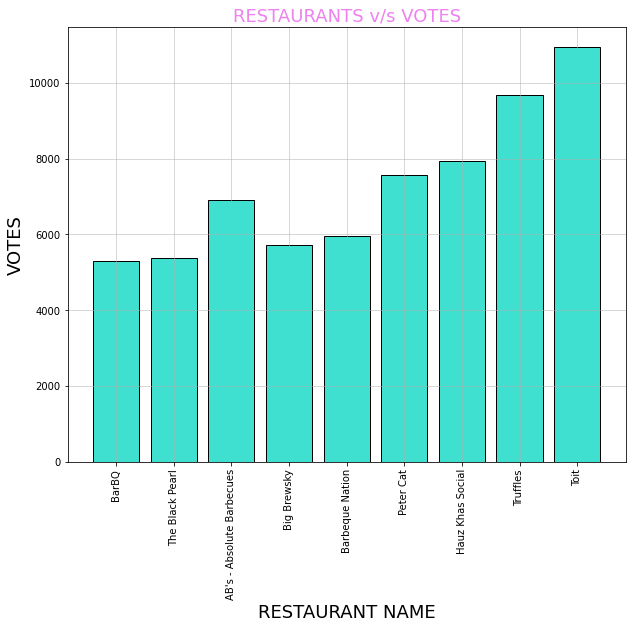

In [25]:
data = d.copy()
data.sort_values('Votes',inplace=True)
y_axis = data.Votes.iloc[-10:]
print(np.array(data['Restaurant Name'].iloc[-10:]) , y_axis)
plt.figure(figsize=(10,8))
plt.bar(np.array(data['Restaurant Name'].iloc[-10:]) , y_axis ,  color = 'turquoise' , edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Restaurant Name'.upper() , size = 18)
plt.ylabel('Votes'.upper() , size = 18)
plt.title("RESTAURANTS v/s VOTES" , size = 18 , color = 'violet')
plt.grid(linewidth = 0.5)
plt.show()

American     112
Seafood       59
Burger        49
Pizza         49
Sandwich      49
Steak         42
Italian       38
Breakfast     37
Mexican       36
Sushi         34
dtype: int64


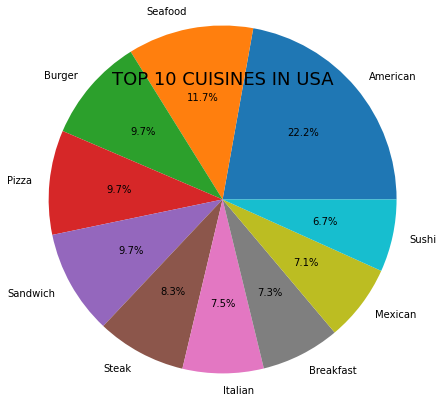

In [16]:
d = pd.read_csv('zomato.csv')
data = d.copy()
data = data[data['Country Code'] == 216]

data.dropna(subset=['Cuisines'],inplace=True)
uc=data.Cuisines
cu=[]
for i in uc:
    for j in i.split(','):
        cu.append(j.strip())
cu = pd.Series(cu)
plt.pie(cu.value_counts().iloc[:10] , autopct='%.1f%%' , radius = 2 , labels = cu.value_counts().index[:10])
print(cu.value_counts().iloc[:10])
plt.title("TOP 10 CUISINES IN USA" , size = 18)
plt.show()


City
Agra              20
Ahmedabad         21
Allahabad         20
Amritsar          21
Aurangabad        20
Bangalore         20
Bhopal            20
Bhubaneshwar      21
Chandigarh        18
Chennai           20
Coimbatore        20
Dehradun          20
Faridabad        251
Ghaziabad         25
Goa               20
Gurgaon         1118
Guwahati          21
Hyderabad         18
Indore            20
Jaipur            20
Kanpur            20
Kochi             20
Kolkata           20
Lucknow           21
Ludhiana          20
Mangalore         20
Mohali             1
Mumbai            20
Mysore            20
Nagpur            20
Nashik            20
New Delhi       5473
Noida           1080
Panchkula          1
Patna             20
Puducherry        20
Pune              20
Ranchi            20
Secunderabad       2
Surat             20
Vadodara          20
Varanasi          20
Vizag             20
Name: Address, dtype: int64


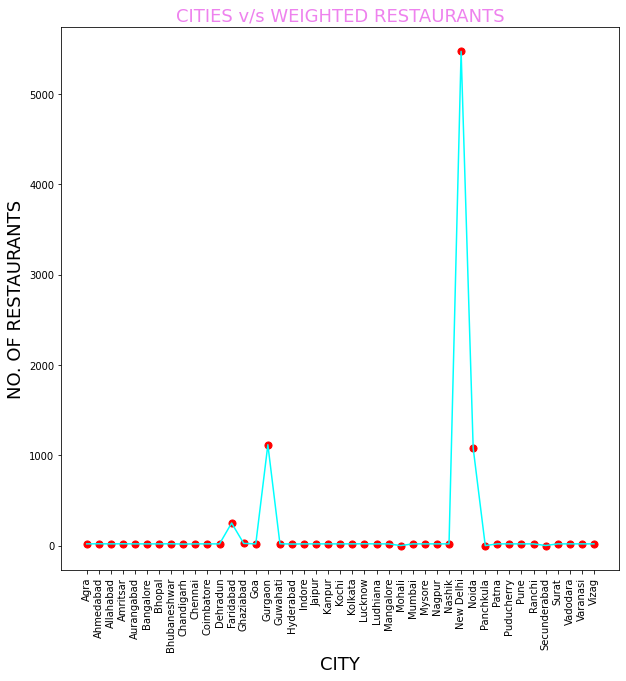

In [27]:
d = d[d['Country Code'] == 1]
data = d.copy()
data['weight_rest'] = data.Votes * data['Aggregate rating']
no = data.groupby('City').count().Address
nd = data.groupby('City').sum()
nd['weight_rest'] = nd.weight_rest / nd.Votes
nd = nd.weight_rest

print(no)

plt.figure(figsize=(10, 10))
plt.scatter(nd.index , no , s = 50 , color = 'red')
plt.plot(nd.index , no , color = 'cyan' )
plt.xticks(rotation = 90)
plt.xlabel('City'.upper() , size = 18)
plt.ylabel('No. of restaurants'.upper() , size = 18)
plt.title("CITIES v/s WEIGHTED RESTAURANTS" , size = 18 , color = 'violet')
plt.show()